# EDA of 'wine' dataset

## Step 0: Imports and Reading Data

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# style sheet for plt and sns
plt.style.use('ggplot')

# inline means we don't have to use plt.show()
%matplotlib inline

# import dataset
df = pd.read_csv('wine.csv', index_col=0) # use 'df' for Dataframe since only one dataset will be loaded

## Step 1: Data Understanding

In [100]:
# get the number of rows and columns in the dataset
df.shape

(1103, 10)

In [101]:
pd.set_option('display.max_columns', 30)    # set the max number of columns displayable before some are hidden
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selecci√≥n Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodr√≠guez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La B√©gude, named af...",La Br√ªlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la B√©gude


In [102]:
# Try getting encoding of wine.csv file as there are mis-formed words,
# for example in row 4 'This is the top wine from La B√©gude, named af...'

import chardet

with open('datasets/wine.csv', 'rb') as f:       # 'rb' == 'read binary', as chardet needs binary data type
    file = f.read()
    print(chardet.detect(file))

{'encoding': 'UTF-8-SIG', 'confidence': 1.0, 'language': ''}


In [103]:
# Using the correct encoding for this .csv file doesn't fix the errors, so, we presume they are actual errors in the file, not a decoding problem
# ... we may have to fix them, depending on what we need to do with the data....

df = pd.read_csv('datasets/wine.csv', index_col=0, encoding='utf-8-sig')

df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selecci√≥n Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodr√≠guez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La B√©gude, named af...",La Br√ªlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la B√©gude


In [104]:
# get the feature names
df.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [105]:
# In a Pandas Dataframe, every column is a Series, and every series has a type, so let's get the datatypes
df.dtypes

country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

So what kind of data do we have?:
* Country - [String][Categorical] Country of origin
* Description - [String][Categorical] Product description
* Points - [Integer][Continuous] The 100-points scale, which rates wines from 0-100, highest is best
* Price - [Float][Continuous] Price, to two decimal places, currency unknown
* Province - [String][Categorical] Province of origin
* Region_1 - [String][Categorical] Region of origin
* Region_2 - [String][Categorical] Additional region of origin, for wines made from grapes from more than a single region
* Variety - [String][Categorical] Variety of wine
* Winery - [String][Categorical] Winery of origin
* Designation - [String][Categorical] Product designation

Of note: a wine's designation refers to the official label or title that indicates the geographical origin and quality of the wine. The designation provides information about the specific vineyard, region, and sometimes the grape variety used to produce the wine.  In some wine-producing countries, there are regulations and standards that must be met in order to use certain designations on a wine label. For example, in France, the use of the "AOC" (Appellation d'Origine Contrôlée) designation indicates that the wine has met strict quality standards for production, grape variety, and geographical origin.  In other countries, designations may be more general, such as "California" or "Australia." In these cases, the designation provides information about the general region where the wine was produced, but may not specify the exact vineyard or grape variety.  A wine's designation can be an important factor in determining its quality and price, as well as providing information about its origin and characteristics.


In [106]:
# show statistics on the numeric features in the dataset
df.describe()

,points,price
count,1103.000000,1046.000000
mean,89.701723,40.242830
std,2.390405,32.588141
min,85.000000,7.000000
25%,88.000000,20.000000
50%,90.000000,31.000000
75%,91.000000,50.000000
max,96.000000,500.000000


## Step 2: Data Preperation

In [107]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selecci√≥n Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodr√≠guez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La B√©gude, named af...",La Br√ªlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la B√©gude


Let's drop 'Description' at least for now, but we may find uses for all the other features

In [108]:
# the below is an easy way to add/remove features at different points in our analysis:
df = df[['country',
    # 'description',
        'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'variety', 'winery']].copy()

# we could also use df.drop: df.drop(['symboling', 'normalized-losses]) etc 

In [109]:
# let's clean up the feature names
df.columns = df.columns.str.title()

In [110]:
# Identify which features are missing data, and how much data is missing from each
df.isna().sum()

Country          0
Designation    269
Points           0
Price           57
Province         0
Region_1       173
Region_2       611
Variety          0
Winery           0
dtype: int64

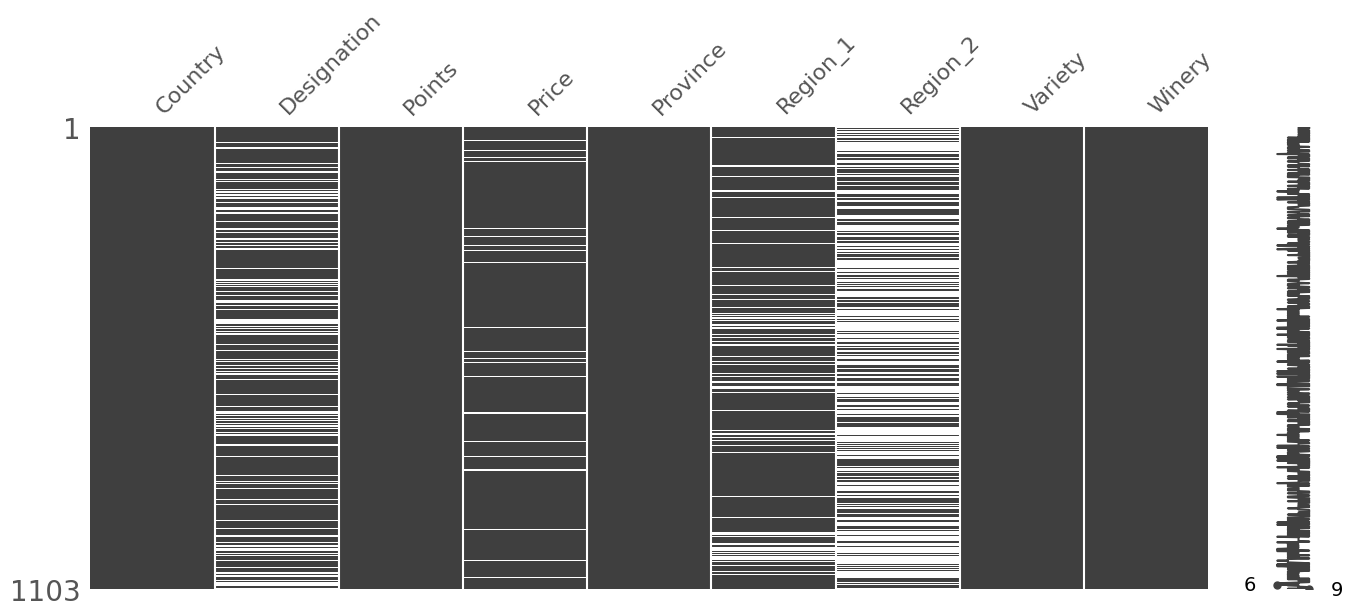

In [111]:
# We can also visualise the dsitribution of missing values in the dataset
import missingno
missingno.matrix(df, figsize=(16,6)); # graph missing values

We could try and impute some of the missing data - to have the missing prices, especially, would be potentially useful.  But let's leave that for now, since there is no simple way to get the missing values.

Region 2 is likely missing many values simply because many wines are made with grapes from only one region.  So lets make a new feature that counts Regions:

In [112]:
df.insert(7, 'Region_count', \
    df[['Region_1', 'Region_2']].notnull().sum(axis=1))

In [113]:
df.head()

,Country,Designation,Points,Price,Province,Region_1,Region_2,Region_count,Variety,Winery
0,US,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,2,Cabernet Sauvignon,Heitz
1,Spain,Carodorum Selecci√≥n Especial Reserva,96,110.0,Northern Spain,Toro,NaN,1,Tinta de Toro,Bodega Carmen Rodr√≠guez
2,US,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,2,Sauvignon Blanc,Macauley
3,US,Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,2,Pinot Noir,Ponzi
4,France,La Br√ªlade,95,66.0,Provence,Bandol,NaN,1,Provence red blend,Domaine de la B√©gude


## Step 3: Data Understanding

Let's start with histograms of the numeric features, to get a sense of the distribution of values

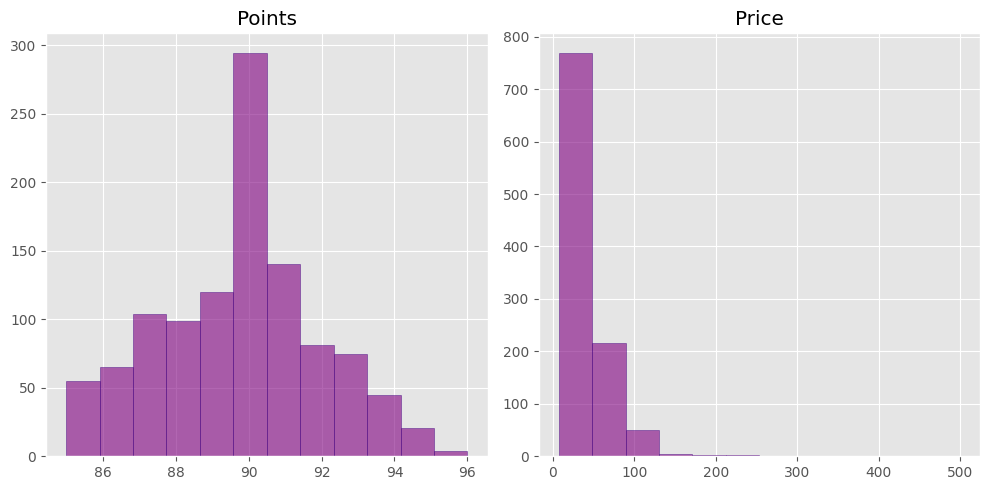

In [114]:
# Let's ignore the Region_count for now
df.drop(['Region_count'], axis=1) \
    .hist(figsize=(10, 5), bins=12, color='purple', alpha=.6, edgecolor=(.25,0,.5,.5))
plt.tight_layout();

'Points' is the wine rating system from 0-100, but we have sufficiently few unique values that we can use it as categorical data. I wonder how many different prices there are?

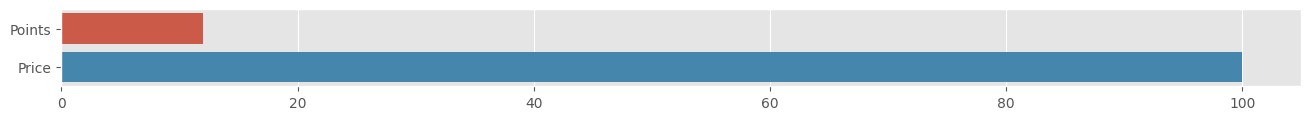

In [115]:
temp = df.loc[:,['Points', 'Price']].nunique()
plt.figure(figsize=(16,1))
f = sns.barplot(x=temp.values, y=temp.index)

Next we should investigate the string categoricals more thoroughly - firstly, how many unique values are there in each category?

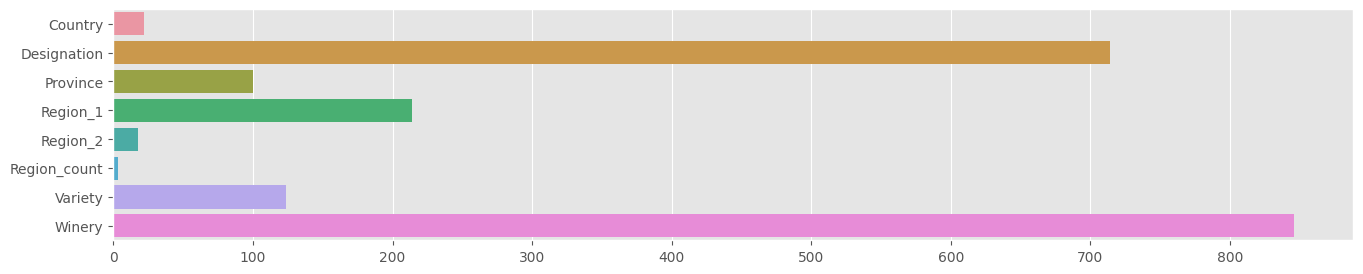

In [116]:
df_cat = df.drop(['Points', 'Price'], axis='columns').nunique()
plt.figure(figsize=(16,3))
f = sns.barplot(x=df_cat.values, y=df_cat.index)

There are so many wineries & designations!!  Country, Province and Variety appear to have more workable numbers of unique entries... but on the other hand, I wonder how many of those unique values are present more than once, or more than just a few times?  Perhaps we could find a useful subset to study based around a common country, for example, or other unique value.
Let's investigate by listing the most used values in each category:

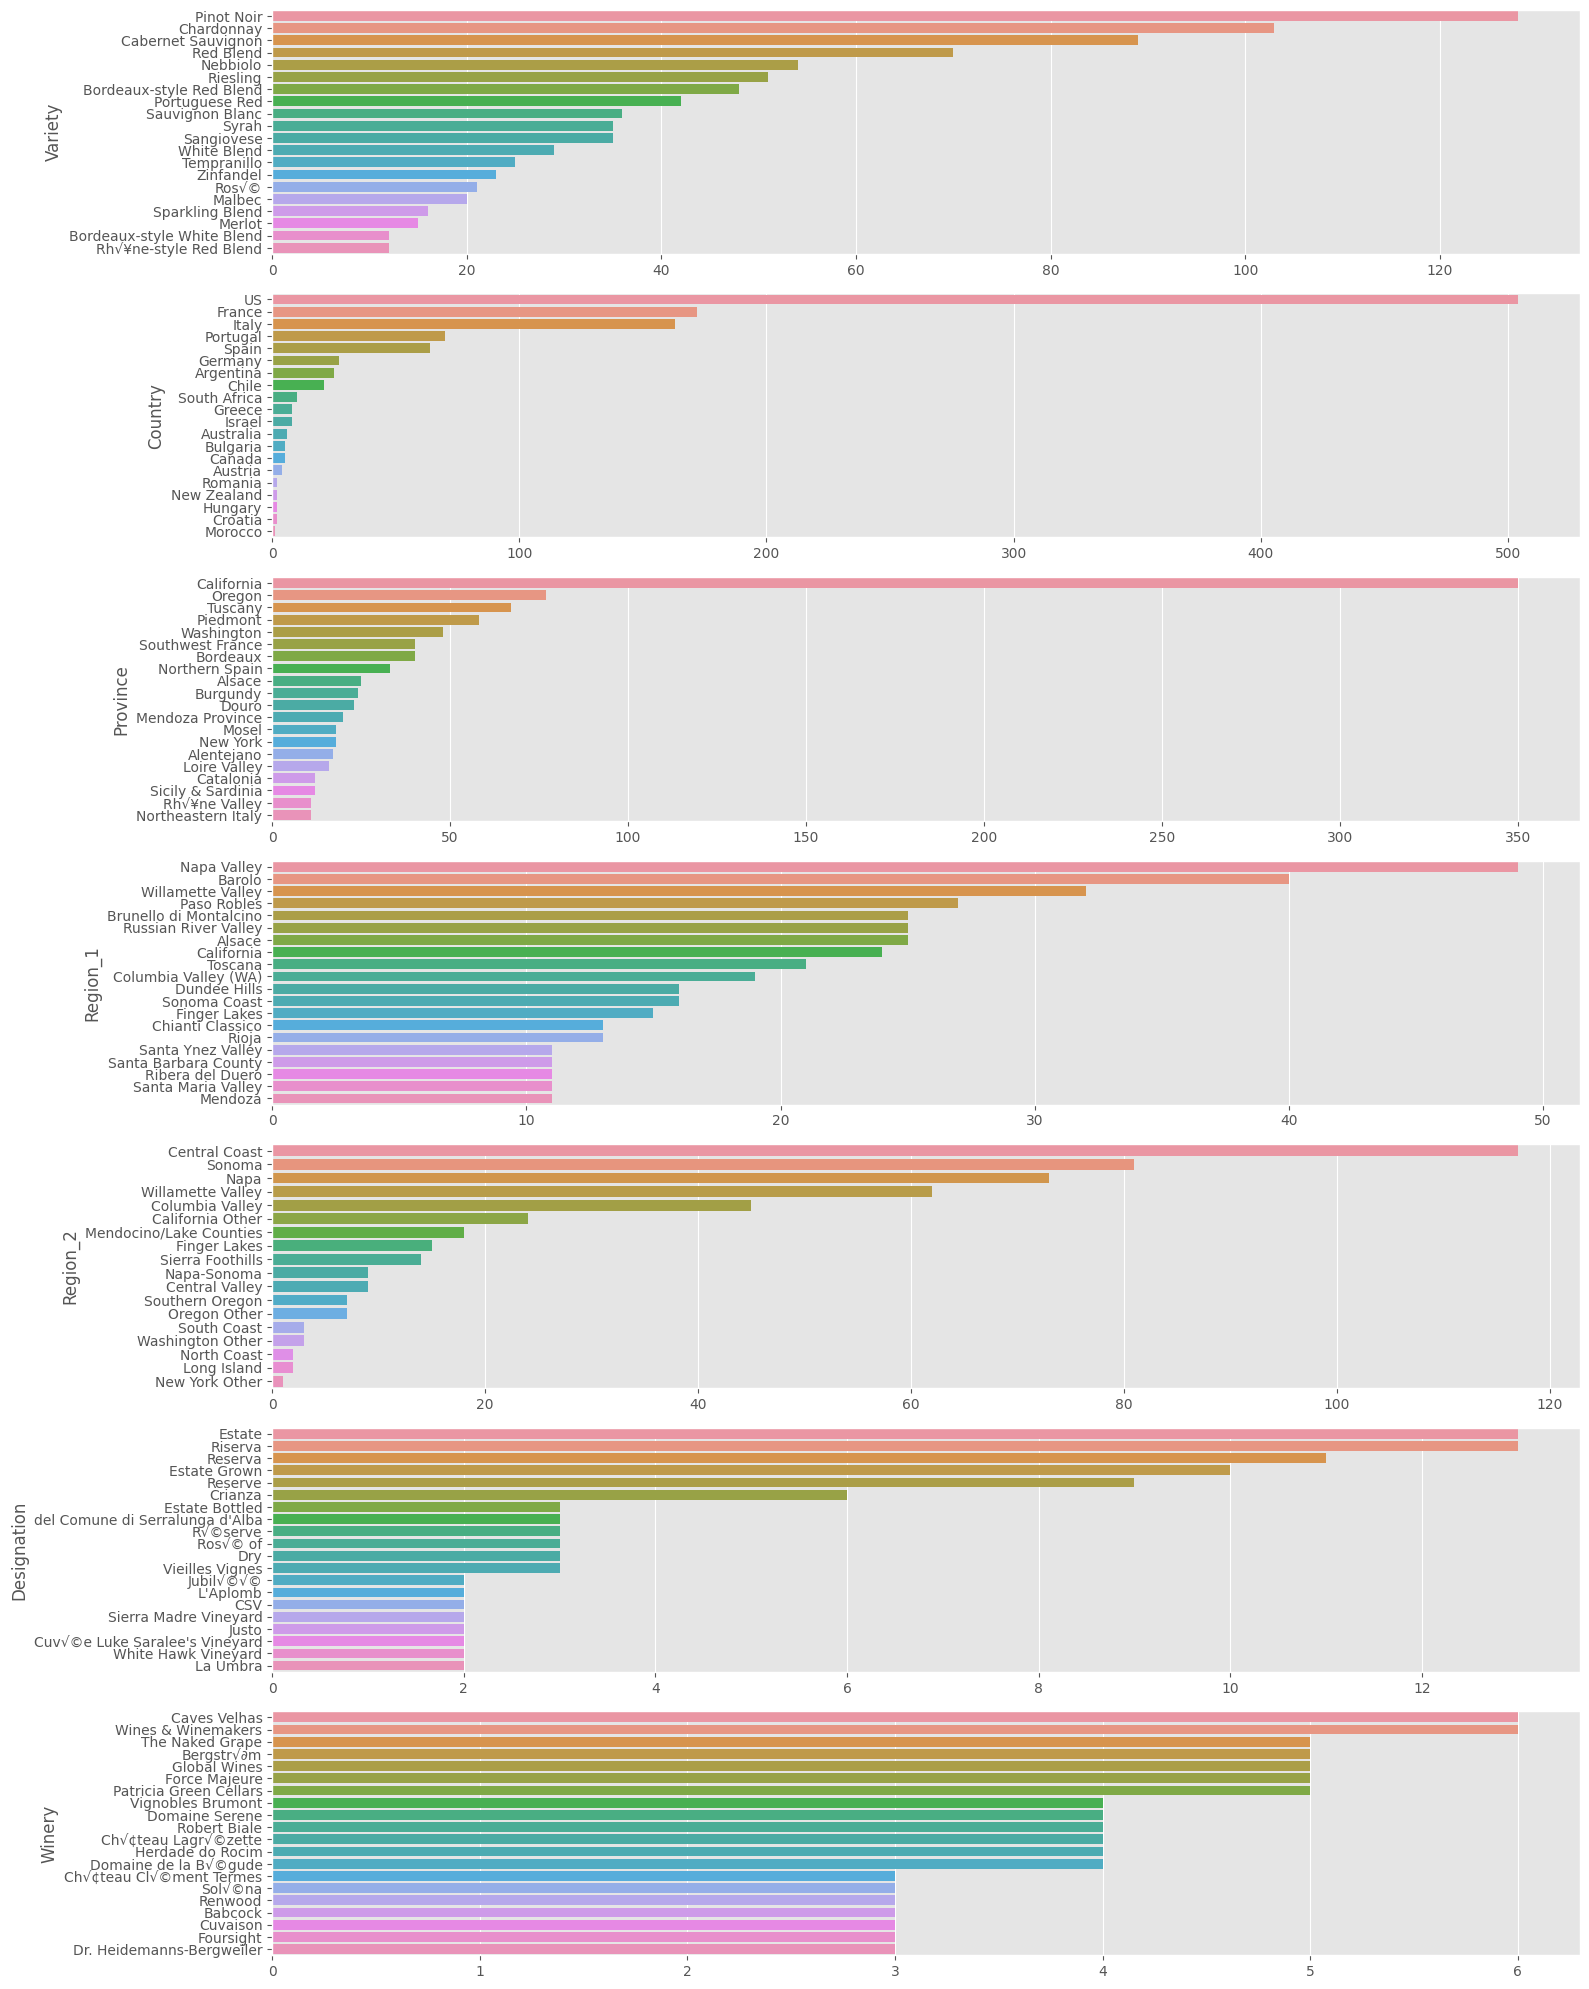

In [117]:
def quick_counts(features, head=10):        
                                      
    fig, ax = plt.subplots(len(features), 1, figsize=(16, head))           
                                     
    for i, f in enumerate(features):                                      
        sns.countplot(df, y=f, order=df[f].value_counts().iloc[:head].index,  ax=ax[i])
        ax[i].set_xlabel("")

    fig.tight_layout()                                


categoricals = ['Variety', 'Country', 'Province', 'Region_1', 'Region_2', 'Designation', 'Winery']
quick_counts(categoricals, 20)


There is so much we could do.... but for now let's move on to

## Step 4: Feature Relationships

There are only a few numerical features in this dataset, but a heatmap of potential correlations is still worth running:

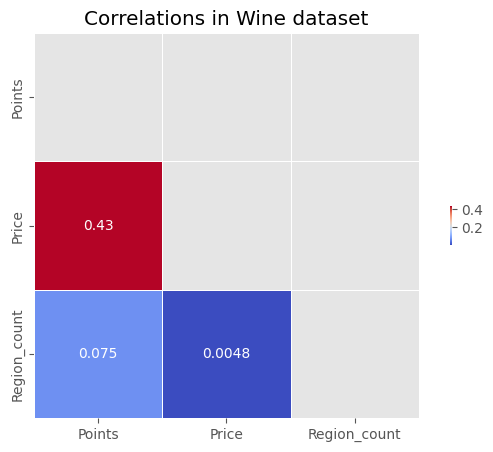

In [118]:
# we should remove wines for which we have no Region information, ie Region_count is zero:
corr = df[df['Region_count'] > 0].corr(numeric_only=True)

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(corr, cmap='coolwarm', annot=True, square=True, ax=ax, mask=mask, cbar_kws={'shrink': 0.10}, linewidths=.5)
plt.title("Correlations in Wine dataset");

Price and Point rating are positively correlated as you'd expect, but only moderately.

Region_count registers negligable correlations.

## Step 5: Ask Questions of the data
Let's compare Points against Price directly.  Perhaps we might detect the presence of some especially good or poor value wines in our dataset:

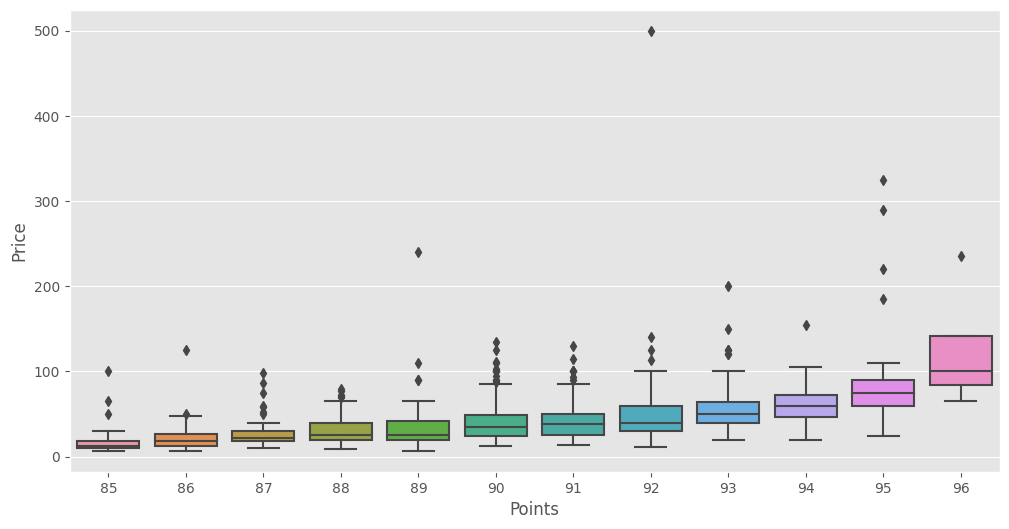

In [119]:
plt.figure(figsize=(12,6))
sns.boxplot(df, x="Points", y="Price");

This graph tells a very interesting story.

It looks like we can pay a wide range of prices for any quality of wine, bar those that score the highest rating of 96.  The lowest and highest prices paid for wines at each Points score do not increase consistently.  However the average prices, and the standard deviation, do increase very consistently, with a notable uptick towards the higher Point scores.

In a given wine rating system, a higher number will obviously generally indicate a higher quality wine. But the criteria used to evaluate the wine can vary between rating systems - a wine with a score of 96 may be considered to be of higher quality than a wine with a score of 85 in one rating system, but it is not always the case.  It's also important to note that wine ratings are subjective and can vary based on the individual taster's personal preferences and palate. Some tasters may prefer a wine with a more fruit-forward or bold flavour profile, while others may prefer a more balanced or elegant wine. A wine that receives a high score from one taster may receive a lower score from another.

The point is, given the different wine rating systems and the inevitable subjectivity involved, it is interesting, and as a consumer possibly very encouraging, that despite some outliers in Price, the overall trend is of Price increasing very consistently with the implied quality of the Point system.  In short, the Points system does well at being representative, and so you're unlikely to overpay for a wine.

Just for fun, Points against Price as a violin plot - they kinda look like wine bottles.....?:

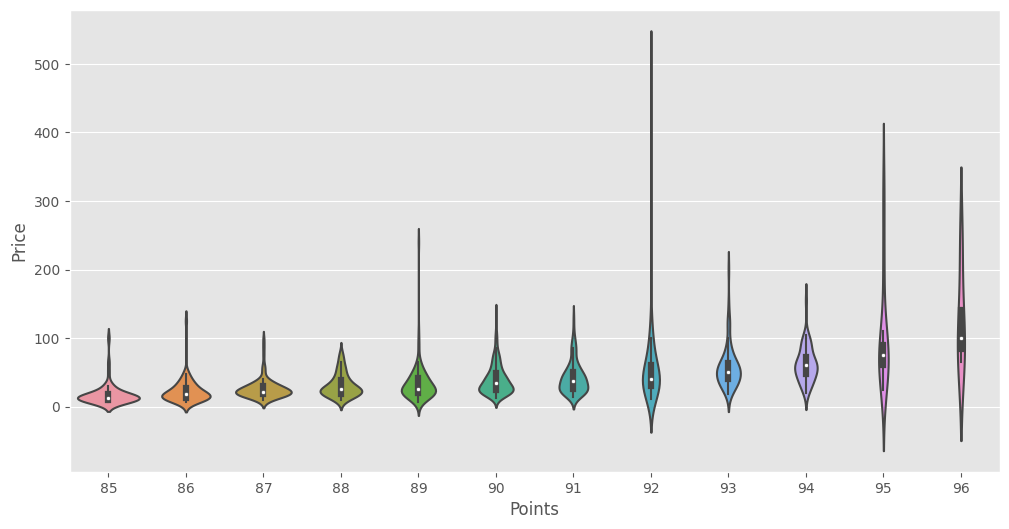

In [120]:
plt.figure(figsize=(12,6))
sns.violinplot(df, x="Points", y="Price");

Finally, a simple question - which Winery, produced from which Region(s), in which Province, in which Country, produces the best wine?

In [121]:
df[df.Points > 95]

,Country,Designation,Points,Price,Province,Region_1,Region_2,Region_count,Variety,Winery
0,US,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,2,Cabernet Sauvignon,Heitz
1,Spain,Carodorum Selecci√≥n Especial Reserva,96,110.0,Northern Spain,Toro,NaN,1,Tinta de Toro,Bodega Carmen Rodr√≠guez
2,US,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,2,Sauvignon Blanc,Macauley
3,US,Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,2,Pinot Noir,Ponzi
